Food Delivery Times (Take Home Test)


## 1. Data Preparation

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
# Menampilkan Jumlah Baris dan Kolom
df.shape

(1000, 9)

In [4]:
# Menampilkan Kolom Dalam Data
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [5]:
# Menampilkan Informasi Type Kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


**Informasi Kolom Dalam Dataset**
1. **Order_ID**, Kode atau identitas unik untuk setiap pesanan yang tercatat dalam sistem.                                 
2. **Distance_km**, Jarak tempuh pengantaran dari lokasi penjual ke alamat pelanggan, diukur dalam kilometer (km).           
3. **Weather**, Kondisi cuaca saat proses pengantaran berlangsung, yang dapat memengaruhi kecepatan perjalanan kurir.
4. **Traffic_Level**, Tingkat kepadatan lalu lintas pada rute pengantaran (misalnya rendah, sedang, atau tinggi).         
5. **Time_of_Day**, Waktu pengantaran berdasarkan periode hari (pagi, siang, sore, atau malam).                          
6. **Vehicle_Type**, Jenis kendaraan yang digunakan oleh kurir untuk mengantarkan pesanan.
7. **Preparation_Time_min**,Waktu yang dibutuhkan oleh penjual untuk menyiapkan pesanan sebelum dikirim, dalam satuan menit.
8. **Courier_Experience_yrs**, Lama pengalaman kerja kurir dalam bidang pengantaran, diukur dalam tahun.
9. **Delivery_Time_minTotal**, waktu pengantaran pesanan hingga sampai ke pelanggan, dalam satuan menit. (Kolom ini menjadi **variabel target** dalam analisis atau pemodelan prediksi).


## 2. Inspeksi Data

In [6]:
# Mendeteksi Missing Value
df.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [7]:
# Menghapus Missing Value
df = df.dropna()

In [8]:
# Mendeteksi Kolom Duplikat
df.duplicated().sum()

0

In [9]:
# Mendeskripsikan Kolom Numerik
df.describe().round(1)

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,883.0,883.0,883.0,883.0,883.0
mean,508.1,10.1,17.0,4.6,56.4
std,287.9,5.7,7.3,2.9,21.6
min,1.0,0.6,5.0,0.0,8.0
25%,263.5,5.1,11.0,2.0,41.0
50%,512.0,10.3,17.0,5.0,55.0
75%,758.5,15.0,23.0,7.0,71.0
max,1000.0,20.0,29.0,9.0,141.0


In [10]:
# Mendeskripsikan Kolom Kategori / Object
df.describe(include = 'object')

,Weather,Traffic_Level,Time_of_Day,Vehicle_Type
count,883,883,883,883
unique,5,3,4,3
top,Clear,Medium,Morning,Bike
freq,425,355,281,451


In [11]:
# Mendeteksi Outlier
numeric_colomns = df.select_dtypes(include='number').columns
outlier_summary = {}
for col in numeric_colomns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)
print("Jumlah Outlier Per Kolom")
for k, v in outlier_summary.items():
    print(f"{k}: {v}")

Jumlah Outlier Per Kolom
Order_ID: 0
Distance_km: 0
Preparation_Time_min: 0
Courier_Experience_yrs: 0
Delivery_Time_min: 4


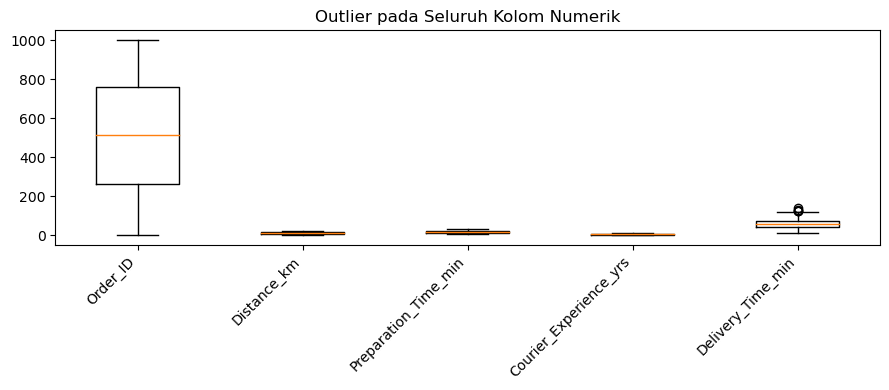

In [12]:
# Menampilkan Visualisasi Outlier (Boxplot)
numeric_colomns = df.select_dtypes(include='number').columns
plt.figure(figsize=(9, 4))
plt.boxplot(
    [df[col].dropna() for col in numeric_colomns],
    labels=numeric_colomns,
    showfliers=True
)
plt.title('Outlier pada Seluruh Kolom Numerik')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. Feature Enginnering

In [13]:
# 1.Membuat Kolom Pure Travel Speed ()km / per min
df["Pure_Travel_Speed_km_per_min"] = (
    df["Distance_km"] / (df["Delivery_Time_min"] - df["Preparation_Time_min"])
)

In [14]:
# 2.Membuat Kolom Total Process Time min
df["Total_Process_Time_min"] = df["Preparation_Time_min"] + df["Delivery_Time_min"]

In [15]:
# 3.Membuat Kolom Travel Time Estimation
df["Travel_Time_Estimation"] = df["Delivery_Time_min"] - df["Preparation_Time_min"]

In [16]:
# 4.Membuat Kolom Traffic Score
traffic_map = {"Low": 1, "Medium": 2, "High": 3}
df["Traffic_Score"] = df["Traffic_Level"].map(traffic_map)

In [17]:
# 5.Membuat Kolom Weather Severity
weather_map = {"Clear": 1, "Windy": 2, "Foggy": 3, "Rainy": 4, "Snowy": 5}
df["Weather_Severity"] = df["Weather"].map(weather_map)

In [18]:
# 6.Membuat Kolom Experience Category
def exp_category(x):
    if x <= 2:
        return "Junior"
    elif x <= 5:
        return "Mid"
    else:
        return "Senior"

df["Experience_Category"] = df["Courier_Experience_yrs"].apply(exp_category)

In [19]:
# 7.Membuat Kolom Traffic Distance Impact
df["Traffic_Distance_Impact"] = df["Distance_km"] * df["Traffic_Score"]

In [20]:
# 8.Membuat Kolom Weather Traffic Index
df["Weather_Traffic_Index"] = df["Weather_Severity"] * df["Traffic_Score"]

In [21]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Pure_Travel_Speed_km_per_min,Total_Process_Time_min,Travel_Time_Estimation,Traffic_Score,Weather_Severity,Experience_Category,Traffic_Distance_Impact,Weather_Traffic_Index
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43,0.255806,55,31,1,2,Junior,7.93,2
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84,0.256563,104,64,2,1,Junior,32.84,2
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59,0.307097,87,31,1,3,Junior,9.52,3
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37,0.232500,42,32,2,4,Junior,14.88,8
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68,0.365962,84,52,1,1,Mid,19.03,1


In [22]:
df.shape

(883, 17)

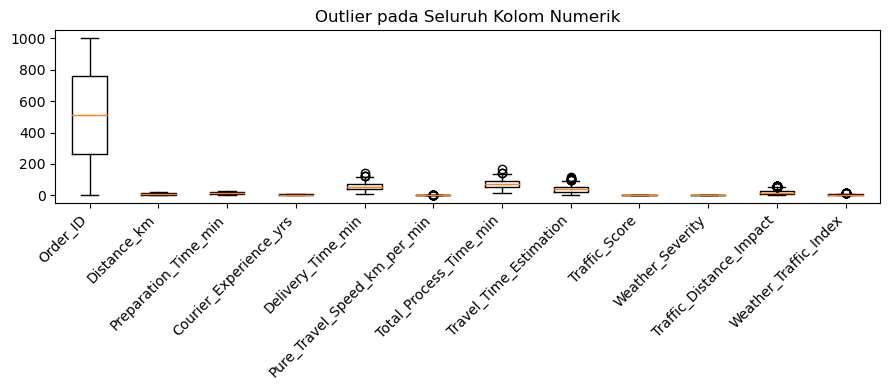

In [23]:
# Menampilkan Visualisasi Outlier (Boxplot)
numeric_colomns = df.select_dtypes(include='number').columns
plt.figure(figsize=(9, 4))
plt.boxplot(
    [df[col].dropna() for col in numeric_colomns],
    labels=numeric_colomns,
    showfliers=True
)
plt.title('Outlier pada Seluruh Kolom Numerik')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
# Simpan File CSV
# df.to_csv("Food_Delivery_Times(Cleaned).csv", index = False, encoding = "utf-8")

## 4. Pemodelan Machine Learning

Dari Hasil Analisis Final dari Data Set ini dapat disimpulkan bahwa **Variabel Target** adalah **Delivery_Time_min** untuk memprediksi Waktu Pengantaran yang dipengaruhi oleh **beberapa faktor** seperti Distance, Traffic, Weather, Experience, dan faktor lainnya. Dan jenis pemodelan yang cocok adalah **Regression**

### a. Data Preparation

In [25]:
# Menampilkan Informasi Type Kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order_ID                      883 non-null    int64  
 1   Distance_km                   883 non-null    float64
 2   Weather                       883 non-null    object 
 3   Traffic_Level                 883 non-null    object 
 4   Time_of_Day                   883 non-null    object 
 5   Vehicle_Type                  883 non-null    object 
 6   Preparation_Time_min          883 non-null    int64  
 7   Courier_Experience_yrs        883 non-null    float64
 8   Delivery_Time_min             883 non-null    int64  
 9   Pure_Travel_Speed_km_per_min  883 non-null    float64
 10  Total_Process_Time_min        883 non-null    int64  
 11  Travel_Time_Estimation        883 non-null    int64  
 12  Traffic_Score                 883 non-null    int64  
 13  Weath

Sebelum melakukan pemodelan ini **data telah dibersihkan** dan dilakukan **proses feature enginnering**

In [26]:
# Drop Kolom Yang Tidak Digunakan Dalam Pemodelan
df = df.drop(columns=["Order_ID", "Pure_Travel_Speed_km_per_min", "Total_Process_Time_min", "Travel_Time_Estimation"], errors = "ignore")

In [27]:
# Mendeskripsikan Kolom Numerik
df.describe().round(1)

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Traffic_Score,Weather_Severity,Traffic_Distance_Impact,Weather_Traffic_Index
count,883.0,883.0,883.0,883.0,883.0,883.0,883.0,883.0
mean,10.1,17.0,4.6,56.4,1.8,2.3,18.2,4.2
std,5.7,7.3,2.9,21.6,0.8,1.5,13.6,3.4
min,0.6,5.0,0.0,8.0,1.0,1.0,0.6,1.0
25%,5.1,11.0,2.0,41.0,1.0,1.0,7.5,2.0
50%,10.3,17.0,5.0,55.0,2.0,2.0,15.1,3.0
75%,15.0,23.0,7.0,71.0,2.0,4.0,25.8,6.0
max,20.0,29.0,9.0,141.0,3.0,5.0,60.0,15.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Distance_km              883 non-null    float64
 1   Weather                  883 non-null    object 
 2   Traffic_Level            883 non-null    object 
 3   Time_of_Day              883 non-null    object 
 4   Vehicle_Type             883 non-null    object 
 5   Preparation_Time_min     883 non-null    int64  
 6   Courier_Experience_yrs   883 non-null    float64
 7   Delivery_Time_min        883 non-null    int64  
 8   Traffic_Score            883 non-null    int64  
 9   Weather_Severity         883 non-null    int64  
 10  Experience_Category      883 non-null    object 
 11  Traffic_Distance_Impact  883 non-null    float64
 12  Weather_Traffic_Index    883 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 96.6+ KB


In [29]:
# Mengambil Hanya Kolom Numerik
numbers = df.select_dtypes(include = ['number']).columns

In [30]:
# Mendeklarasikan Hanya Kolom Numerik
df = df[numbers]

In [31]:
df.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Traffic_Score,Weather_Severity,Traffic_Distance_Impact,Weather_Traffic_Index
0,7.93,12,1.0,43,1,2,7.93,2
1,16.42,20,2.0,84,2,1,32.84,2
2,9.52,28,1.0,59,1,3,9.52,3
3,7.44,5,1.0,37,2,4,14.88,8
4,19.03,16,5.0,68,1,1,19.03,1


### b. Pemilihan Feature

In [32]:
# Memisahkan variabel bebas (x) dan terikat (y)
X = df.drop("Delivery_Time_min", axis=1)
y = df["Delivery_Time_min"]

<Axes: >

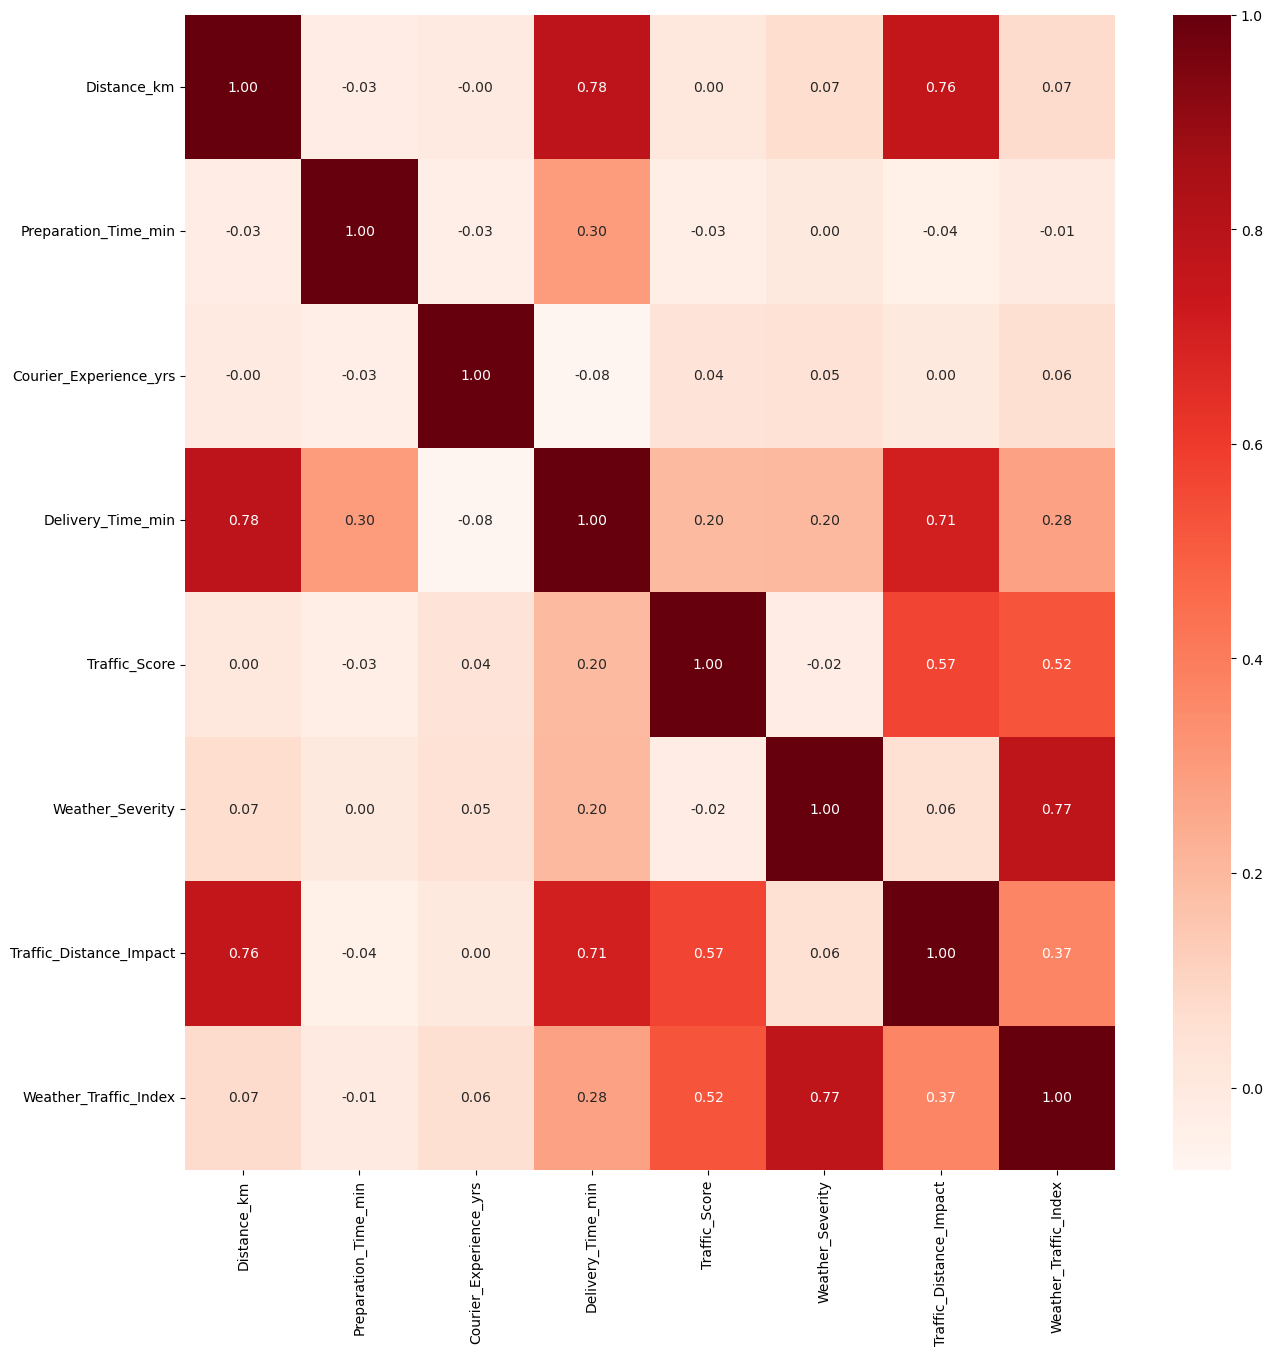

In [33]:
# Correlation Heatmap untuk melihat korelasi linear antara kolom-kolom numerik
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.2f', annot_kws={"size": 10})

In [34]:
#Mengecek nilai VIF setiap kolom
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(X.shape[1])]

vif_data

,feature,VIF
0,Distance_km,17.808122
1,Preparation_Time_min,5.729260
2,Courier_Experience_yrs,3.425154
3,Traffic_Score,12.038052
4,Weather_Severity,16.067132
5,Traffic_Distance_Impact,19.896672
6,Weather_Traffic_Index,17.522000


Dari Nilai Korelasi Heatmap Dan Nilai VIF **tidak ada yang di drop** karena tidak memenuhi syarat Korelasi > 0.8 dan Nilai VIF > 4

In [35]:
# Drop Variabel Target (Delivery_Time_min)
X = df.drop(columns = ['Delivery_Time_min'])
X.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Traffic_Score,Weather_Severity,Traffic_Distance_Impact,Weather_Traffic_Index
0,7.93,12,1.0,1,2,7.93,2
1,16.42,20,2.0,2,1,32.84,2
2,9.52,28,1.0,1,3,9.52,3
3,7.44,5,1.0,2,4,14.88,8
4,19.03,16,5.0,1,1,19.03,1


### c. Modeling

In [36]:
#Membagi data latih dan uji (80% data latih, 20% data uji)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Menampilkan Data X (Train)
X_train.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Traffic_Score,Weather_Severity,Traffic_Distance_Impact,Weather_Traffic_Index
685,6.44,18,2.0,1,1,6.44,1
488,4.14,23,2.0,1,4,4.14,4
407,9.75,22,7.0,1,1,9.75,1
402,3.02,23,1.0,2,4,6.04,8
87,7.30,14,7.0,1,1,7.30,1


In [38]:
# Menampilkan Data X (Test)
X_test.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Traffic_Score,Weather_Severity,Traffic_Distance_Impact,Weather_Traffic_Index
48,2.09,23,2.0,1,4,2.09,4
910,0.59,21,0.0,1,1,0.59,1
816,4.53,18,4.0,2,5,9.06,10
748,18.72,17,0.0,2,4,37.44,8
995,8.50,13,3.0,3,1,25.50,3


In [39]:
# Membuat Model Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Melihat koefisien masing-masing fitur
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
})

# Melihat nilai intercept
print("Intercept:", model.intercept_)

coef_df

Intercept: 0.04376976578112135


,feature,coefficient
0,Distance_km,2.897045
1,Preparation_Time_min,0.929801
2,Courier_Experience_yrs,-0.659732
3,Traffic_Score,4.950836
4,Weather_Severity,1.626794
5,Traffic_Distance_Impact,0.040434
6,Weather_Traffic_Index,0.290514


### d. Evaluasi

In [41]:
# Prediksi Model Linear Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prediksi
y_pred = model.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# MAPE (gunakan rumus manual karena sklearn tidak menyediakan)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2 = r2_score(y_test, y_pred)

print("Prediksi Linear Regression")
print("MAE :", mae)
print("MAPE:", mape, "%")
print("RMSE:", rmse)
print("R2:", r2)

Prediksi Linear Regression
MAE : 5.266697845501929
MAPE: 10.075982330091477 %
RMSE: 8.197056159745705
R2: 0.8356045634679108


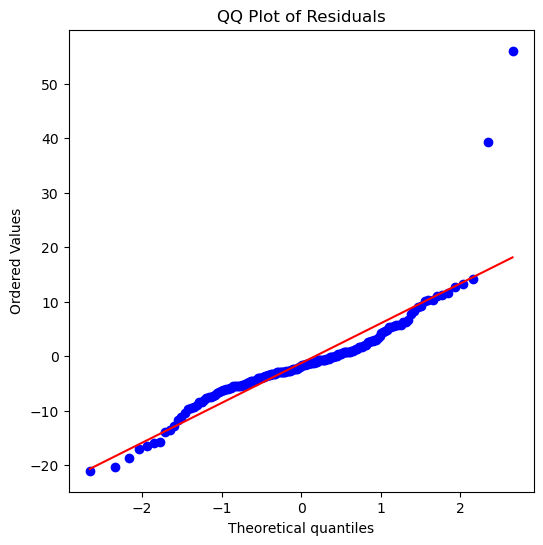

In [42]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Hitung residual
residual = y_test - y_pred

# QQ Plot
plt.figure(figsize=(6,6))
stats.probplot(residual, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

### e. Normalisasi dengan StandardScaler

In [43]:
#Normalisasi Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Menampilkan Data X (Train) Setalah di Standardrisasi
X_train_scaled

array([[-0.66965704,  0.12587122, -0.89143865, ..., -0.91804584,
        -0.8976738 , -0.97100959],
       [-1.07550676,  0.81261834, -0.89143865, ...,  1.09065363,
        -1.06579229, -0.09956963],
       [-0.08558635,  0.67526892,  0.81413232, ..., -0.91804584,
        -0.65572938, -0.97100959],
       ...,
       [-0.39967875, -1.11027361,  1.15524651, ..., -0.24847935,
        -0.20327138, -0.09956963],
       [ 0.74552329, -0.83557476,  1.4963607 , ...,  1.09065363,
         0.74550163,  1.06235032],
       [-0.34850639, -0.28617706, -1.23255284, ...,  1.76022012,
        -0.76464092,  0.19091036]])

In [45]:
# Menampilkan Data X (Test) Setalah di Standardrisasi
X_test_scaled

array([[-1.43724238,  0.81261834, -0.89143865, ...,  1.09065363,
        -1.21563702, -0.09956963],
       [-1.70192698,  0.53791949, -1.57366704, ..., -0.91804584,
        -1.32527951, -0.97100959],
       [-1.00668876,  0.12587122, -0.20921026, ...,  1.76022012,
        -0.70616492,  1.64331029],
       ...,
       [-0.48084869,  1.36201604,  0.47301812, ...,  1.09065363,
        -0.81946216, -0.09956963],
       [-0.99786594,  0.67526892,  1.4963607 , ..., -0.91804584,
        -0.36408036, -0.39004961],
       [-0.52849192,  1.49936547,  0.47301812, ...,  1.09065363,
        -0.30999007,  1.06235032]])

### f. Ridge

In [46]:
# Membuat Model Ridge
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

Ridge()

In [47]:
# Melihat koefisien masing-masing fitur
coef_df_ridge = pd.DataFrame({
    'feature': X.columns,
    'coefficient': ridge.coef_
})

# Melihat nilai intercept
print("Intercept:", ridge.intercept_)

coef_df_ridge

Intercept: 57.5


,feature,coefficient
0,Distance_km,16.244387
1,Preparation_Time_min,6.761175
2,Courier_Experience_yrs,-1.927658
3,Traffic_Score,3.565466
4,Weather_Severity,2.406209
5,Traffic_Distance_Impact,0.748064
6,Weather_Traffic_Index,1.021794


In [48]:
# Prediksi Model Ridge
y_pred = ridge.predict(X_test_scaled)

# MAE
mae_ridge = mean_absolute_error(y_test, y_pred)

# MAPE (gunakan rumus manual karena sklearn tidak menyediakan)
mape_ridge = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# RMSE
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2_ridge = ridge.score(X_test_scaled, y_test)

print("Prediksi Ridge Regression")
print("MAE :", mae_ridge)
print("MAPE:", mape_ridge, "%")
print("RMSE:", rmse_ridge)
print("R2:", r2_ridge)

Prediksi Ridge Regression
MAE : 5.285904687529636
MAPE: 10.15538689543832 %
RMSE: 8.201729700994758
R2: 0.8354170503256376


### g. Lasso

In [49]:
# Membuat Model Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)

Lasso()

In [50]:
# Melihat koefisien masing-masing fitur
coef_df_lasso = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lasso.coef_
})

# Melihat nilai intercept
print("Intercept:", lasso.intercept_)

coef_df_lasso

Intercept: 57.5


,feature,coefficient
0,Distance_km,13.098566
1,Preparation_Time_min,5.733985
2,Courier_Experience_yrs,-0.811731
3,Traffic_Score,0.000000
4,Weather_Severity,0.000000
5,Traffic_Distance_Impact,3.522310
6,Weather_Traffic_Index,2.863415


In [51]:
# Prediksi Model Lasso
y_pred = lasso.predict(X_test_scaled)

# MAE
mae_lasso = mean_absolute_error(y_test, y_pred)

# MAPE (gunakan rumus manual karena sklearn tidak menyediakan)
mape_lasso = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# RMSE
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2_lasso = lasso.score(X_test_scaled, y_test)

print("Prediksi Lasso Regression")
print("MAE :", mae_lasso)
print("MAPE:", mape_lasso, "%")
print("RMSE:", rmse_lasso)
print("R2:", r2_lasso)

Prediksi Lasso Regression
MAE : 6.248408752759783
MAPE: 13.997766550184492 %
RMSE: 8.696913080728416
R2: 0.8149435630980788
